In [ ]:
from pydub import AudioSegment
import os
from tqdm import tqdm

In [ ]:
folder_path_sao = ""
folder_path_sao_processed = ""

In [ ]:
print(os.listdir(folder_path_sao))

['10.wav', '1.wav', '11.wav', '13.wav', '12.wav', '14.wav', '15.wav', '17.wav', '16.wav', '19.wav', '18.wav', '2.wav', '20.wav', '21.wav', '22.wav', '23.wav', '26.wav', '25.wav', '24.wav', '27.wav', '28.wav', '29.wav', '3.wav', '31.wav', '30.wav', '32.wav', '33.wav', '35.wav', '34.wav', '36.wav', '37.wav', '38.wav', '39.wav', '4.wav', '40.wav', '41.wav', '42.wav', '43.wav', '5.wav', '7.wav', '8.wav', '6.wav', '9.wav', 'allemande_fifth_fragment_preston.wav', 'allemande_fifth_fragment_rampal.wav', 'allemande_fifth_fragment_preston_resampled.wav', 'allemande_first_fragment_larrieu.wav', 'allemande_first_fragment_nicolet.wav', 'allemande_fourth_fragment_gerard.wav', 'allemande_fourth_fragment_larrieu.wav', 'allemande_second_fragment_gerard.wav', 'allemande_second_fragment_preston.wav', 'allemande_second_fragment_preston_resampled.wav', 'allemande_third_fragment_nicolet.wav', 'allemande_third_fragment_rampal.wav', 'density_fifth_fragment_beauregard.wav', 'density_first_fragment_zoon.wav', '

In [ ]:
list_dir_sao = os.listdir(folder_path_sao)

In [ ]:
class Split_Audio:
  def __init__(self, folder_path, folder_path_processed):
    self.folder_path = folder_path
    self.folder_path_processed = folder_path_processed
    if not os.path.exists(self.folder_path):
      raise FileNotFoundError(f"Thư mục {self.folder_path} không tồn tại.")
    os.makedirs(self.folder_path_processed, exist_ok=True)
    self.list_dir = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
  def split_audio(self):
    if not self.list_dir:
      print("Không tìm thấy file .wav nào trong thư mục.")
      return
    for file_name in tqdm(self.list_dir, desc="Đang tải dữ liệu"):
      file_path = os.path.join(self.folder_path, file_name)
      audio = AudioSegment.from_wav(file_path)
      segment_duration = 3 * 1000
      total_segments = len(audio) // segment_duration
      if total_segments == 0:
        print(f"Bỏ qua {file_name} vì quá ngắn (< 3s).")
        continue
      for i in tqdm(range(total_segments), desc=f"  -> Cắt {file_name}", leave=False):
        start_time = i * segment_duration
        end_time = start_time + segment_duration
        chunk = audio[start_time : end_time]
        chunk_name = f"{os.path.splitext(file_name)[0]}_chunk_{i}.wav"
        chunk.export(os.path.join(self.folder_path_processed, chunk_name), format="wav")
    print("Done")

In [ ]:
splitter_sao = Split_Audio(folder_path_sao, folder_path_sao_processed)
splitter_sao.split_audio()

Đang tải dữ liệu:  60%|██████    | 45/75 [01:01<00:31,  1.05s/it]
  -> Cắt allemande_fifth_fragment_preston_resampled.wav:   0%|          | 0/6 [00:00<?, ?it/s]
  -> Cắt allemande_fifth_fragment_preston_resampled.wav: 100%|██████████| 6/6 [00:00<00:00, 58.39it/s]
Đang tải dữ liệu:  69%|██████▉   | 52/75 [01:05<00:13,  1.65it/s]
  -> Cắt allemande_second_fragment_preston_resampled.wav:   0%|          | 0/6 [00:00<?, ?it/s]
  -> Cắt allemande_second_fragment_preston_resampled.wav:  50%|█████     | 3/6 [00:00<00:00, 13.11it/s]
  -> Cắt allemande_second_fragment_preston_resampled.wav:  83%|████████▎ | 5/6 [00:00<00:00, 12.31it/s]
Đang tải dữ liệu: 100%|██████████| 75/75 [01:23<00:00,  1.11s/it]

Done


In [ ]:
folder_path_trumpet = ""
folder_path_trumpet_processed = ""

In [ ]:
print(os.listdir(folder_path_trumpet))

['1.wav', '16.wav', '15.wav', '14.wav', '13.wav', '12.wav', '11.wav', '10.wav', '21.wav', '20.wav', '2.wav', '19.wav', '18.wav', '17.wav', '29.wav', '28.wav', '27.wav', '26.wav', '25.wav', '24.wav', '23.wav', '22.wav', '35.wav', '34.wav', '33.wav', '32.wav', '31.wav', '30.wav', '3.wav', '8.wav', '7.wav', '6.wav', '5.wav', '4.wav', '38.wav', '37.wav', '36.wav', '9.wav']


In [ ]:
splitter_trumpet = Split_Audio(folder_path_trumpet, folder_path_trumpet_processed)
splitter_trumpet.split_audio()

Đang tải dữ liệu: 100%|██████████| 38/38 [00:35<00:00,  1.08it/s]

Done


In [ ]:
test_file = f""

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import soundfile as sf

In [ ]:
def preprocess_audio(filepath, target_sr=22050, n_fft=2048, win_length=1024, hop_length=512, n_mels=128, normalize=False):
    audio, sr = sf.read(filepath, dtype="float32")
    # Chuyển stereo thành mono nếu cần
    if audio.ndim > 1:
        audio = np.mean(audio, axis=1)  # axis=1 để lấy trung bình theo kênh
    # Resample nếu tần số không đúng
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
        sr = target_sr
    # Chuẩn hóa tín hiệu [-1, 1]
    if np.max(np.abs(audio)) > 0:
        audio = audio / np.max(np.abs(audio))
    # Tính STFT
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, win_length=win_length))
    # Chuyển sang Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(S=stft, sr=sr, n_mels=n_mels)
    # Áp dụng log transform
    mel_compressed = np.log1p(mel_spectrogram)
    # Chuẩn hóa về [0, 1] nếu cần
    if normalize and np.max(mel_compressed) > 0:
        mel_compressed /= np.max(mel_compressed)
    return mel_compressed

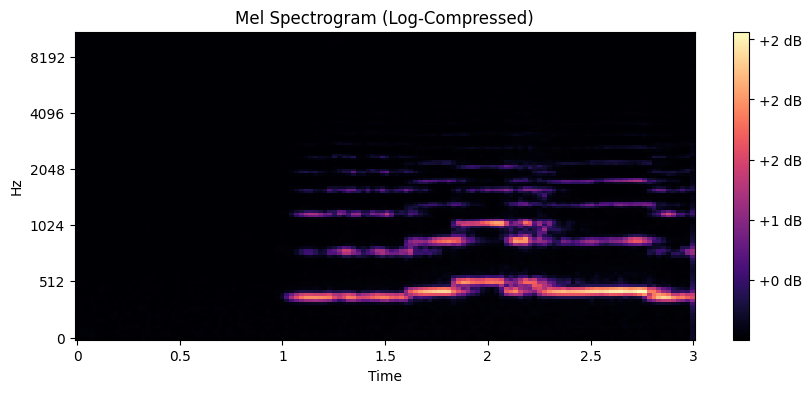

In [ ]:
mel_spec = preprocess_audio(test_file)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, x_axis="time", y_axis="mel", sr=22050)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram (Log-Compressed)")
plt.show()

In [ ]:
print(mel_spec.shape)

(128, 130)


In [ ]:
print(mel_spec)

[[2.05612686e-02 1.03677670e-02 8.84258933e-03 ... 2.07024608e-02
  1.31175080e-02 1.74212471e-01]
 [1.73173603e-02 3.05496845e-02 2.61853058e-02 ... 2.72713173e-02
  1.34288315e-02 1.72060087e-01]
 [8.72613583e-03 3.74250859e-02 3.17259431e-02 ... 2.30429564e-02
  4.02149046e-03 1.61819860e-01]
 ...
 [6.14741468e-04 6.38037978e-04 7.36429647e-04 ... 5.91222616e-03
  1.27595216e-02 2.69484781e-02]
 [3.32248776e-04 6.80861005e-04 5.85340313e-04 ... 4.22180304e-03
  1.04673970e-02 2.19325852e-02]
 [1.00855526e-04 1.16252544e-04 8.85684494e-05 ... 1.08878326e-03
  2.12272187e-03 1.98679585e-02]]


In [ ]:
import h5py

In [ ]:
folder_path_trumpet_processed = ""
folder_path_sao_processed = ""

In [ ]:
print(os.listdir(folder_path_trumpet_processed))
print(os.listdir(folder_path_sao_processed))

['17_chunk_11.wav', '29_chunk_0.wav', '29_chunk_1.wav', '29_chunk_2.wav', '29_chunk_3.wav', '29_chunk_4.wav', '29_chunk_5.wav', '29_chunk_6.wav', '29_chunk_7.wav', '29_chunk_8.wav', '29_chunk_9.wav', '29_chunk_10.wav', '29_chunk_11.wav', '29_chunk_12.wav', '29_chunk_13.wav', '29_chunk_14.wav', '28_chunk_0.wav', '28_chunk_1.wav', '28_chunk_2.wav', '28_chunk_3.wav', '28_chunk_4.wav', '28_chunk_5.wav', '28_chunk_6.wav', '28_chunk_7.wav', '28_chunk_8.wav', '28_chunk_9.wav', '28_chunk_10.wav', '28_chunk_11.wav', '28_chunk_12.wav', '28_chunk_13.wav', '28_chunk_14.wav', '28_chunk_15.wav', '28_chunk_16.wav', '28_chunk_17.wav', '28_chunk_18.wav', '28_chunk_19.wav', '28_chunk_20.wav', '28_chunk_21.wav', '28_chunk_22.wav', '27_chunk_0.wav', '27_chunk_1.wav', '27_chunk_2.wav', '27_chunk_3.wav', '27_chunk_4.wav', '27_chunk_5.wav', '27_chunk_6.wav', '27_chunk_7.wav', '27_chunk_8.wav', '27_chunk_9.wav', '27_chunk_10.wav', '27_chunk_11.wav', '27_chunk_12.wav', '27_chunk_13.wav', '26_chunk_0.wav', '26_

In [ ]:
len(os.listdir(folder_path_trumpet_processed))

1242

In [ ]:
class Process_Audio:
  def __init__(self, folder_path, file_name_out, target_sr=22050, n_fft=2048, win_length=1024, hop_length=512, n_mels=128, normalize=False):
    self.folder_path = folder_path
    self.file_name_out = file_name_out
    self.target_sr = target_sr
    self.n_fft = n_fft
    self.win_length = win_length
    self.hop_length = hop_length
    self.n_mels = n_mels
    self.normalize = normalize
    self.list_dir = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

  def process(self):
    if not self.list_dir:
      print("Không tìm thấy file .wav nào trong thư mục.")
    with h5py.File(self.file_name_out, "w") as hf:
      for i, file_name in tqdm(enumerate(self.list_dir), total=len(self.list_dir), desc="Đang tải dữ liệu"):
        filepath = os.path.join(self.folder_path, file_name)
        audio, sr = sf.read(filepath, dtype="float32")
        # Chuyển stereo thành mono nếu cần
        if audio.ndim > 1:
            audio = np.mean(audio, axis=1)  # axis=1 để lấy trung bình theo kênh
        # Resample nếu tần số không đúng
        if sr != self.target_sr:
            audio = librosa.resample(audio, orig_sr=sr, target_sr=self.target_sr)
            sr = self.target_sr
        # Chuẩn hóa tín hiệu [-1, 1]
        if np.max(np.abs(audio)) > 0:
            audio = audio / np.max(np.abs(audio))
        # Tính STFT
        stft = np.abs(librosa.stft(audio, n_fft=self.n_fft, hop_length=self.hop_length, win_length=self.win_length))
        # Chuyển sang Mel Spectrogram
        mel_spec = librosa.feature.melspectrogram(S=stft, sr=sr, n_mels=self.n_mels)
        # Áp dụng log transform
        mel_spec = np.log1p(mel_spec)
        # Chuẩn hóa về [0, 1] nếu cần
        if self.normalize and np.max(mel_spec) > 0:
            mel_spec /= np.max(mel_spec)
        if mel_spec.shape[1] < 130:
            mel_spec = np.pad(mel_spec, ((0, 0), (0, 130 - mel_spec.shape[1])), mode="constant")
        mel_spec = mel_spec[:, :130]

        hf.create_dataset(f"mel_spec_sao_{i}", data=mel_spec)

      print(f"Đã lưu HDF5: {self.file_name_out}")




In [ ]:
folder_path = f""

In [ ]:
process_audio_sao = Process_Audio(folder_path_sao_processed, os.path.join(folder_path, "mel_spectrogram_sao.h5"))
process_audio_sao.process()

Đang tải dữ liệu: 100%|██████████| 1897/1897 [01:31<00:00, 20.68it/s]


Đã lưu HDF5: /content/drive/MyDrive/ML_datasets/mel_spectrogram_sao.h5


In [ ]:
file_path_sao = f""

Key: mel_spec_sao_0, Shape: (128, 130)
Key: mel_spec_sao_1, Shape: (128, 130)
Key: mel_spec_sao_10, Shape: (128, 130)
Key: mel_spec_sao_100, Shape: (128, 130)
Key: mel_spec_sao_1000, Shape: (128, 130)
[[1.20474033e-01 4.40690815e-02 2.00461466e-02 ... 6.90075979e-02
  7.56109282e-02 7.95089230e-02]
 [1.42239109e-01 8.43770802e-03 6.91458397e-03 ... 1.82523876e-02
  7.85609335e-03 2.71206331e-02]
 [1.44024760e-01 3.14517994e-03 5.61404414e-03 ... 1.06966095e-02
  4.25306521e-03 6.48675207e-03]
 ...
 [1.22281751e-02 7.35632051e-03 1.12961372e-02 ... 3.61110055e-04
  2.34389241e-04 2.52832891e-04]
 [1.01819476e-02 3.56837828e-03 3.92289460e-03 ... 2.38207154e-04
  1.46221078e-04 2.70158227e-04]
 [4.27426863e-03 1.46178028e-03 1.26787717e-03 ... 4.11871042e-05
  3.43901156e-05 1.68369341e-04]]
1897


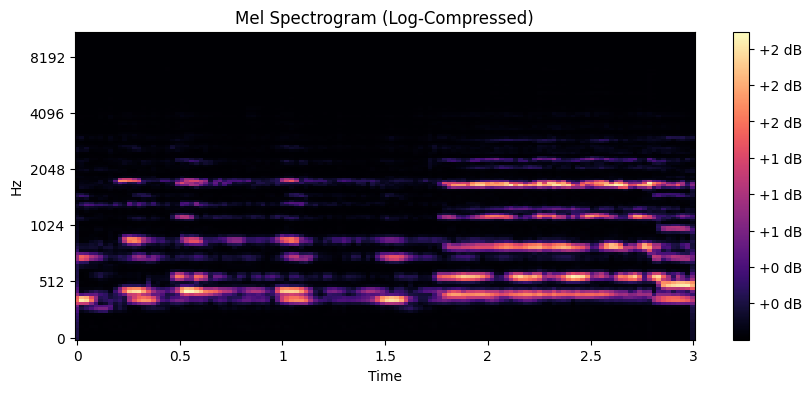

In [ ]:
with h5py.File(file_path_sao, "r") as hf:
  keys = list(hf.keys())[:5]
  for key in keys:
    data = hf[key][:]
    print(f"Key: {key}, Shape: {data.shape}")
  print(hf[keys[0]][:])
  print(len(list(hf.keys())))
  mel_spec = hf[keys[2]][:]

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(mel_spec, x_axis="time", y_axis="mel", sr=22050)
  plt.colorbar(format="%+2.0f dB")
  plt.title("Mel Spectrogram (Log-Compressed)")
  plt.show()

In [ ]:
process_audio_trumpet = Process_Audio(folder_path_trumpet_processed, os.path.join(folder_path, "mel_spectrogram_trumpet_new.h5"))
process_audio_trumpet.process()

Đang tải dữ liệu: 100%|██████████| 1242/1242 [05:13<00:00,  3.96it/s]


Đã lưu HDF5: /content/drive/MyDrive/ML_datasets/mel_spectrogram_trumpet_new.h5


In [ ]:
file_path_trumpet = f""

Key: mel_spec_sao_0, Shape: (128, 130)
Key: mel_spec_sao_1, Shape: (128, 130)
Key: mel_spec_sao_10, Shape: (128, 130)
Key: mel_spec_sao_100, Shape: (128, 130)
Key: mel_spec_sao_1000, Shape: (128, 130)
[[0.08038748 0.00246543 0.0023365  ... 0.0008918  0.00156942 0.10256483]
 [0.08341926 0.00201077 0.00169178 ... 0.00084343 0.0013029  0.10690384]
 [0.08311029 0.00075042 0.00195987 ... 0.00106741 0.00130583 0.10775826]
 ...
 [0.00674517 0.00162093 0.00256457 ... 0.00142621 0.00136218 0.01522672]
 [0.00538911 0.00227311 0.00253877 ... 0.00116593 0.00116239 0.01548603]
 [0.00209869 0.00033607 0.00051284 ... 0.000217   0.00028582 0.01360643]]
1242


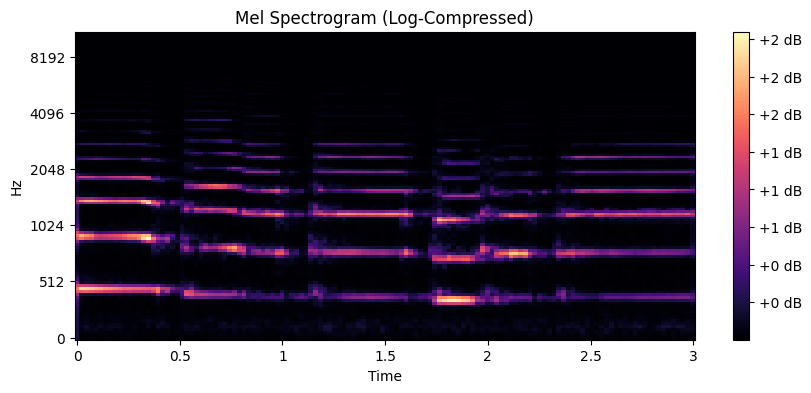

In [ ]:
with h5py.File(file_path_trumpet, "r") as hf:
  keys = list(hf.keys())[:5]
  for key in keys:
    data = hf[key][:]
    print(f"Key: {key}, Shape: {data.shape}")
  print(hf[keys[0]][:])
  print(len(list(hf.keys())))
  mel_spec = hf[keys[2]][:]

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(mel_spec, x_axis="time", y_axis="mel", sr=22050)
  plt.colorbar(format="%+2.0f dB")
  plt.title("Mel Spectrogram (Log-Compressed)")
  plt.show()